In [66]:
import pandas as pd
import numpy as np

In [67]:
players = pd.read_csv("football.csv")

C:\Users\Welcome\AppData\Local\Temp\ipykernel_5052\4288915094.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("football.csv")


In [68]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [69]:
features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [95]:
players = players.dropna(subset=features) 
#dropna will remove all the rows having null values in features

In [96]:
data = players[features].copy()

In [97]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [99]:
# scaling data is important 
# as without it some features with higher average value will overshadow others
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [100]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.146473,1.243826,4.403716
std,1.496262,1.323418,0.392477,0.557253,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.024022,1.014306,2.851852
50%,5.130435,5.782609,1.049796,1.071531,4.333333
75%,6.000000,6.652174,1.102634,1.214592,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [101]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,11.000000,10.565217,5.020341,10.141631,7.666667
1,10.782609,10.347826,7.159616,8.711016,6.925926
2,10.565217,10.130435,3.319231,8.711016,8.407407
3,10.565217,10.130435,7.649329,8.711016,5.814815
4,10.565217,10.130435,7.468908,11.000000,6.185185


In [105]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        # this will chose a random value from all the rows of a certain feature
        centroid = data.apply(lambda x: float(x.sample())) 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [106]:
centroids = random_centroids(data, 5)
centroids

C:\Users\Welcome\AppData\Local\Temp\ipykernel_5052\3962097338.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,5.347826,5.782609,8.173913,4.260870,6.000000
potential,3.608696,5.347826,7.956522,6.000000,6.652174
value_eur,1.008815,1.082014,1.076859,1.005206,1.035620
wage_eur,1.042918,1.128755,1.000000,5.992847,1.071531
age,3.592593,3.962963,3.222222,5.074074,5.814815


In [114]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1) 

In [115]:
labels = get_labels(data, centroids)

In [116]:
labels.value_counts()

0    7755
1    6526
2    4884
Name: count, dtype: int64

In [120]:
def new_centroids(data, labels):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x)).mean()).T
    return centroids

In [121]:
from sklearn.decomposition import PCA #Principal Component Analysis
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [126]:
def plot_clusters(data, labels, centroids, iteration): 
    pca = PCA(n_components=2) 
    data_2d = pca.fit_transform(data) # reduce to 2 dimensions
    centroids_2d = pca.fit_transform(centroids.T) 
    clear_output(wait=True) 
    plt.title(f'Iteration {iteration}') 
    plt.scatter(x=data_2d[:,0], y= data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

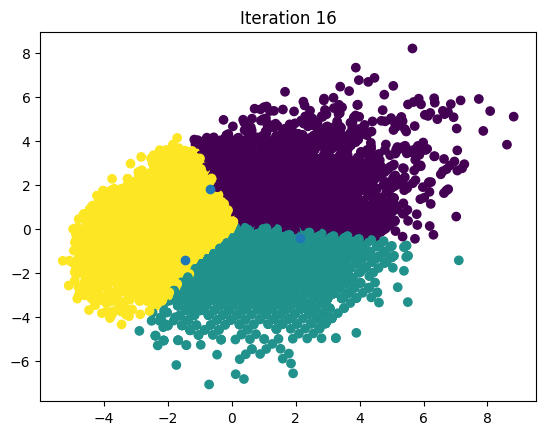

In [127]:
max_iters = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iters and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [131]:
centroids

,0,1,2
overall,6.788600,5.225706,3.877134
potential,7.232374,4.891624,5.662322
value_eur,1.453132,1.044413,1.039230
wage_eur,1.718987,1.125938,1.043781
age,4.471047,6.135867,2.903670


In [132]:
labels.value_counts()

2    7755
1    6526
0    4884
Name: count, dtype: int64

In [133]:
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
5067,Jaimosa Cavaco,70,70,1700000.0,9000.0,21
5069,Paolinho Leima,70,70,1700000.0,12000.0,21
5077,Jonaldo Monteiro,70,70,1700000.0,5000.0,21
5079,Luildo Simões,70,70,1900000.0,12000.0,21
5085,Allison Sireo,70,70,1600000.0,6000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19
